# <font color = "darkblue">Ecuaciones Diferenciales Parciales de Evolución </font>

# <font color = "darkblue"> Ecuación de Calor</font>

Las ecuaciones diferenciales parciales (EDPs) constituyen una área de suma importancia en la física, ya que modelan sistemas que varían con respecto a más de una variable independiente, por ejemplo, tanto el tiempo como el espacio. 


Del punto de vista numérico, el tipo de EDPs que es (conceptualmente) más sencillo son las llamadas **parabólicas**, es decir, **ecuaciones de evolución**, de las cuales la más conocida es la **ecuación de calor** o **ecuación de difusión.**

# Ecuación de Calor 

La ecuación de calor modela el esparcimiento en el tiempo y en el espacio de un "paquete" de calor (perturbación local de temperatura en una región) o un "paquete" de concentración de una sustancia física o química. 

Sea $u(t, \mathbf{x})$ la temperatura o la concentración de la sustancia en la posición **x** al tiempo t. Recordando que la ecuación de calor es 

$$\frac{\partial u(t, \mathbf{x})}{\partial t} = D \, \nabla^2 u(t, \mathbf{x}),$$


con  $\nabla^2 := \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}$ en tres dimensiones.

Esta ecuación nos dice cómo varía la concentración en el tiempo, dadas las condiciones locales en el espacio. Se deriva en términos de una ley de conservación: 

$$\frac{\partial u}{\partial t} + \nabla \cdot \mathbf{J} = 0,$$

donde el flujo de calor o de concentración $\mathbf{J}$ es proporcional al gradiente local:

$$\mathbf{J} = -D \, \nabla u.$$


La ecuación de calor es una **ecuación de evolución** que describe cómo evoluciona el sistema en el tiempo. Por lo tanto, su tratamiento se sigue de forma directa de lo que sabemos para EDOs.

# Una dimensión 

El caso más sencillo, con sólo una dimensión espacial. En este caso, la ecuación de calor se reduce a 

$$\frac{\partial u(t, x)}{\partial t} = D \frac{\partial^2 u(t, x)}{\partial x^2}.$$

Para resolverla, necesitaremos además:
- una condición inicial $u(t=0, x) = f(x)$ (una función del espacio)
- condiciones en la frontera, $u(t, x)$ para todo $x$ en la frontera del dominio espacial, y para todo $t$.

Dado que, como siempre, no podemos resolver problemas de naturaleza continua en la computadora, debemos *aproximar* la solución $u(t, x)$ de alguna forma. La manera más sencilla es, de nuevo, utilizar una **discretización**.

¿Cómo se puede discretizar $u(t,x)$ utilizando un tamaño de paso h en el tiempo y k en el espacio? Pensando que los valores posibles de $x$ son en el intervalo $[0, L]$.

Denotando con $t_n$ el tiempo al paso número $n$, y con $u^n_i$ la aproximación de la solución en el nodo número $i$ en el espacio al tiempo $n$.



Primero hay que aproximar la derivada parcial temporal usando un paso de Euler, esto es
$$
\dfrac{\partial u(t,x)}{\partial t} \approx \dfrac{u(t+h,x) - u(t,x)}{h}
$$

Por otro lado la segunda parcial con respecto a x usando diferencias centradas es

$$
\dfrac{\partial^2 u(t,x)}{\partial x^2} \approx \dfrac{u(t,x+k)-2u(t,x)+u(t,x-k)}{k^2}
$$

Por lo que, si se sustituye en la expresión se tiene la aproximación para u
$$
u(t,x) \approx \dfrac{k^2 u(t+h,x) - hu(t,x+2k)+2hu(t,x+k)}{h+k^2}
$$

Por lo que sustituyendo en la ecuación de calor
$$
\dfrac{u(t+h,x) - u(t,x)}{h} \approx D\dfrac{u(t,x+k)-2u(t,x)+u(t,x-k)}{k^2} $$
$$\Rightarrow [u(t+h,x) - u(t,x)] \approx \dfrac{Dh}{k^2}[u(t,x+k)-2u(t,x)+u(t,x-k)]$$

Tomando $\mu = \frac{Dh}{k^2}$

$$\Rightarrow u(t+h,x) \approx u(t,x) +  \mu  [u(t,x+k)-2u(t,x)+u(t,x-k)]  \qquad \qquad \qquad (5) $$ 


**Ejercicio1** 

Considera la ecuación de calor en una dimensión sobre el intervalo de $x=-L$ a $x=L$, con condición inicial $u(t=0, x) = \delta(x)$, donde $\delta$ es la delta de Dirac, y condiciones de frontera absorbentes (de Dirichlet), es decir, $u(t, -L) = u(t, +L) = 0$ para todo $t > 0$.

(i) ¿Qué esperas intuitivamente que pase durante la evolución? ¿Qué ocurrirá para tiempos largos?

(ii) Implementa el sistema, tomando cuidado en lo que ocurre en las fronteras. Para hacerlo, utiliza un vector para representar el estado actual del sistema, y otro vector para el estado al tiempo siguiente.

(iii) Dibuja la evolución en el tiempo (es decir, dibuja $u(x,t)$ para varios valores de $t$ en una sola gráfica, y con `Interact`). ¿Ocurre lo que esperabas?

(iv) ¿Qué ocurre si tomas otra condición inicial, por ejemplo una suma de dos deltas?

**Punto Extra**

(v) ¿Qué pasa con la energía del sistema? 

In [1]:
using Plots  
using Interact
include("herramientas.jl")
gr()

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8255395437457743712\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12305806906284082292\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8255395437457743712\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

In [2]:
#Con una sola delta de Dirac
t, x, u = SolCalor(5, 4, 0.01, 1, 1);

Tomando D=1 

$\mu=\frac{\Delta t}{(\Delta x)^2}$  es lo suficientemente importante como para tener un nombre propio, **Courant number** 

**Teorema**

Si $\mu$ $\leq$ $\frac{1}{2}$ entonces el método $(5)$ es convergente.

In [3]:
@manipulate for t in 1:length(t)
    plot(x, u[:,t], ylims=(0,1), label = "Sol t = $t", lw=2)
    xlabel!(" x ")
    ylabel!(" u_sol ")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["t"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 401,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
201, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/rborja/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rborja/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rborja/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/rborja/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/rborja/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011bc133d0, Task (runnable) @0x000000011bc133d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\

┌ Info: Saved animation to 
│   fn = /Users/rborja/Documents/U.N.A.M/Ayudantia2020_2/AlgebraLinealComputacional2020_2/Clase/Dirichlet.gif
└ @ Plots /Users/rborja/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Users/rborja/Documents/U.N.A.M/Ayudantia2020_2/AlgebraLinealComputacional2020_2/Clase/Dirichlet.gif")
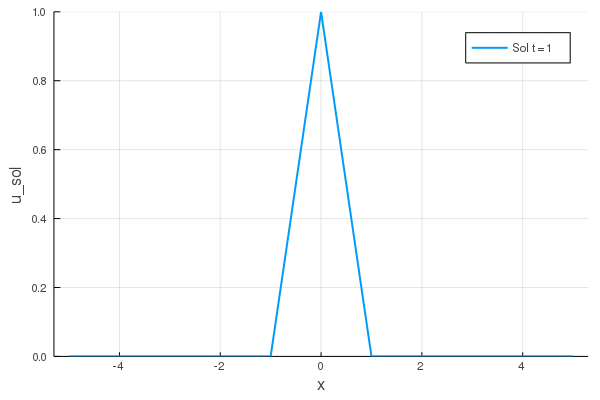

In [4]:
anim = @animate for t in 1:2:length(u[1,:])
    plot(x, u[:,t], ylims=(0,1), label = "Sol t = $t", lw=2)
    xlabel!(" x ")
    ylabel!(" u_sol ")
    end every 1

gif(anim, "Dirichlet.gif", fps=20)

In [5]:
# SUMA de dos deltas de Dirac 
function SolCalor2(L, t, h, k, D)
    #intervalos
    x  = -L:k:L
    ts = 0:h:t
    
    #genero la estructura de datos donde guardo la solución
    xLong, tsLong = length(x), length(ts)
    Sol           = zeros(xLong, tsLong)
    
    #Impongo condicíon inicial 
    Sol[floor(Int, length(Sol[:,1])/4 + 1), 1] = 1
    Sol[floor(Int, length(Sol[:,1])/2 + 4), 1] = 1
    
    #Itero para generar la solución
    cte = (h*D)/k^2
    
    for i in 1:length(ts) - 1
        for j in 2:length(x)-1
            Sol[j, i + 1] = cte*(Sol[j+1, i] - 2*Sol[j,i] + Sol[j-1, i]) + Sol[j, i]
        end
    end
    
    return ts, x, Sol
end

SolCalor2 (generic function with 1 method)

In [6]:
t2, x2, u2 = SolCalor2(5, 4, 0.01, 1, 2);

In [7]:
@manipulate for t in 1:length(t2)
    plot(x2, u2[:,t], ylims=(0,1), label = "Sol t = $t", lw=2)
    xlabel!(" x ")
    ylabel!(" u_sol ")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["t"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 401,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
201, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/rborja/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/rborja/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/rborja/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/rborja/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/rborja/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011b9e1d50, Task (runnable) @0x000000011b9e1d50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\

┌ Info: Saved animation to 
│   fn = /Users/rborja/Documents/U.N.A.M/Ayudantia2020_2/AlgebraLinealComputacional2020_2/Clase/Dirichlet2.gif
└ @ Plots /Users/rborja/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Users/rborja/Documents/U.N.A.M/Ayudantia2020_2/AlgebraLinealComputacional2020_2/Clase/Dirichlet2.gif")
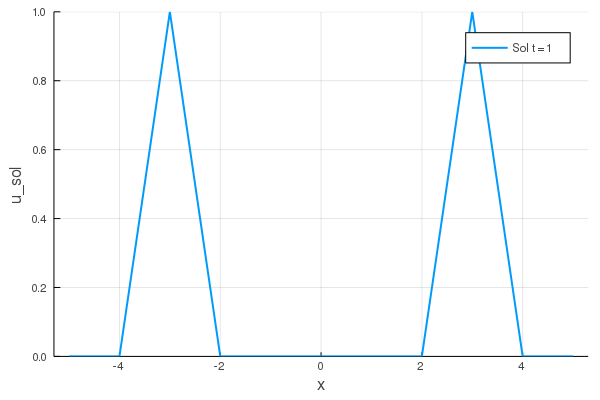

In [8]:
anim = @animate for t in 1:2:length(u2[1,:])
    plot(x2, u2[:,t], ylims=(0,1), label = "Sol t = $t", lw=2)
    xlabel!(" x ")
    ylabel!(" u_sol ")
    end every 1

gif(anim, "Dirichlet2.gif", fps=20)